<a href="https://colab.research.google.com/github/ms624atyale/PictureBook_Archive_inProgress/blob/main/prototype_mattrbyauthor_simplified_ccw_wcloud_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐹🐾 <font color = 'green'> **Python code for MATTR all at once**

In [ ]:
!pip install pandas
!pip install lexical_diversity
import pandas as pd #Import Pandas Package
import lexical_diversity as ld

!git clone "https://github.com/ms624atyale/PictureBook_Archive_inProgress"
%cd /content/PictureBook_Archive_inProgress/Data_Final

import glob
# Load all .txt files
fns = glob.glob('*.txt')

# List to hold each temporary DataFrame
df_list = []

# Load each file and append to list
for fn in fns:
    dftmp = pd.read_csv(fn, sep='@')
    df_list.append(dftmp)

# Concatenate all and reset index
df = pd.concat(df_list, ignore_index=True)

%cd /content

df.to_csv("./pg_5creators_16books.csv")

df
print(df)
print('\n')





import pandas as pd
from lexical_diversity import lex_div as ld

# Load the CSV (skip if already loaded)
df = pd.read_csv("./pg_5creators_16books.csv", sep=",")



# Added column: String length
#df['Lemma'] is a column from a pandas DataFrame, so len(df['Lemma']) gives you the number of rows (or entries) in that column.
lemma = []

for i in range(0, len(df['text'])):
  LEM = ld.flemmatize(df['text'][i])
  print(LEM)
  lemma.append(LEM)

df['Lemma'] = lemma

print('\n')
print(df['Lemma'])





# ADD LD indices

#1. Create empty lists.
TTR = []
MATTR = []

# 2. Getting LD index values for each cell:

for i in range(0, len(df['Lemma'])):
  flt = df['Lemma'][i]
  ttr = ld.ttr(flt)
  mattr = ld.mattr(flt)


  # Add values to each list
  TTR.append(ttr)
  MATTR.append(mattr)


# Add columns
df['TTR'] = TTR
df['MATTR'] = MATTR





# Clean up creator names
df['creator'] = df['creator'].str.strip().str.lower()

df_creator_ld = df.groupby("creator")['MATTR'].mean().reset_index()
df_creator_ld = df_creator_ld.round(6)

# --- STEP 6: Save and display results ---
df_creator_ld.to_csv('LD_by_creator.csv', index=False)
print("✅ Lexical diversity by creator saved as 'LD_by_creator.csv'!\n")
df_creator_ld

fatal: destination path 'PictureBook_Archive_inProgress' already exists and is not an empty directory.
/content/PictureBook_Archive_inProgress/Data_Final
/content
                                                 text  \
0   a carrion crow sat on an oak,   fol de riddle,...   
1   there was once a man who had three sons, the y...   
2   johnny crow would dig and sow  till he made a ...   
3   the man in the moon.             the man in th...   
4   one morning a little rabbit sat on a bank.  he...   
5   a farmyard tale     for     ralph and betsy   ...   
6   once upon a time there was a little girl calle...   
7   once upon a time there were four little rabbit...   
8   this is a tale about a tail--a tail that belon...   
9   once upon a time there were three little kitte...   
10  nonsense books how pleasant to know mr. lear! ...   
11  there was once a sweet little maid who lived w...   
12  an alphabet of old friends a  a carrion crow s...   
13  the baby's opera  1. girls and boys

,creator,MATTR
0,beatrix potter,0.783324
1,edward lear,0.745887
2,leslie brooke,0.644836
3,walter crane,0.749162
4,watty piper,0.742587


# 🐹🐾 <font color = 'green'>>**Python code for MATTR broken into two code cells for tableau used in publishing paper**</font> Including ['Data Size] using len( )

In [ ]:
!pip install pandas
!pip install lexical_diversity
import pandas as pd #Import Pandas Package
import lexical_diversity as ld

#!git clone "https://github.com/ms624atyale/PictureBook_Archive_inProgress"
%cd /content/PictureBook_Archive_inProgress/Data_Final

import glob
# Load all .txt files
fns = glob.glob('*.txt')

# List to hold each temporary DataFrame
df_list = []

# Load each file and append to list
for fn in fns:
    dftmp = pd.read_csv(fn, sep='@')
    df_list.append(dftmp)

# Concatenate all and reset index
df = pd.concat(df_list, ignore_index=True)

%cd /content

df.to_csv("./pg_5creators_16books.csv")

df
print(df)
print('\n')





import pandas as pd
from lexical_diversity import lex_div as ld

# Load the CSV (skip if already loaded)
df = pd.read_csv("./pg_5creators_16books.csv", sep=",")

#INSERTED BETWEEN START
!pip install textstat
import textstat

df['N_Sents'] = df['text'].apply(textstat.sentence_count)
df.to_csv('LD_result_with_Nsents.csv')


# Added column: String length
length = []

for i in range(0, len(df['text'])):
  LEN = len(df['text'][i])
  length.append(LEN)

df['Data size'] = length
print(df)




# Added column:  Splitted words, Length of splitted words
tsplit = []
splen = []

for i in range(0, len(df['text'])):
  TSP = df['text'][i].split()
  SPLEN = len(TSP)
  tsplit.append(TSP)
  splen.append(SPLEN)
  # print(TSP)

df['Splits'] = tsplit
df['N_Splits'] = splen
print(df)
#INSERTED BETWEEN END






# Added column: String length
#df['Lemma'] is a column from a pandas DataFrame, so len(df['Lemma']) gives you the number of rows (or entries) in that column.
lemma = []

for i in range(0, len(df['text'])):
  LEM = ld.flemmatize(df['text'][i])
  print(LEM)
  lemma.append(LEM)

df['Lemma'] = lemma

print('\n')
print(df['Lemma'])





# ADD LD indices

#1. Create empty lists.
TTR = []
MATTR = []

# 2. Getting LD index values for each cell:

for i in range(0, len(df['Lemma'])):
  flt = df['Lemma'][i]
  ttr = ld.ttr(flt)
  mattr = ld.mattr(flt)


  # Add values to each list
  TTR.append(ttr)
  MATTR.append(mattr)


# Add columns
df['TTR'] = TTR
df['MATTR'] = MATTR

# INSERTED BETWEEN START
df_selected = df[['creator','N_Splits','N_Sents','MATTR']]
df_selected
# INSERTED BETWEEN END





/content/PictureBook_Archive_inProgress/Data_Final
/content
                                                 text  \
0   a carrion crow sat on an oak,   fol de riddle,...   
1   there was once a man who had three sons, the y...   
2   johnny crow would dig and sow  till he made a ...   
3   the man in the moon.             the man in th...   
4   one morning a little rabbit sat on a bank.  he...   
5   a farmyard tale     for     ralph and betsy   ...   
6   once upon a time there was a little girl calle...   
7   once upon a time there were four little rabbit...   
8   this is a tale about a tail--a tail that belon...   
9   once upon a time there were three little kitte...   
10  nonsense books how pleasant to know mr. lear! ...   
11  there was once a sweet little maid who lived w...   
12  an alphabet of old friends a  a carrion crow s...   
13  the baby's opera  1. girls and boys come out t...   
14  the baby’s own Aesop Aesop’s fables the fox & ...   
15  the old english garden  

,creator,N_Splits,N_Sents,MATTR
0,leslie brooke,153,7,0.577500
1,leslie brooke,5116,234,0.726363
2,leslie brooke,216,14,0.638084
3,leslie brooke,518,41,0.637399
4,beatrix potter,1123,78,0.775307
5,beatrix potter,1252,90,0.789842
6,beatrix potter,1272,88,0.785315
7,beatrix potter,948,62,0.798354
8,beatrix potter,1207,68,0.781157
9,beatrix potter,691,51,0.769969


In [ ]:
# Clean up creator names
df['creator'] = df['creator'].str.strip().str.lower()

df_creator_ld = df.groupby("creator")['MATTR'].mean().reset_index()
df_creator_ld = df_creator_ld.round(6)

# --- STEP 6: Save and display results ---
df_creator_ld.to_csv('LD_by_creator.csv', index=False)
print("✅ Lexical diversity by creator saved as 'LD_by_creator.csv'!\n")
df_creator_ld

✅ Lexical diversity by creator saved as 'LD_by_creator.csv'!



,creator,MATTR
0,beatrix potter,0.783324
1,edward lear,0.745887
2,leslie brooke,0.644836
3,walter crane,0.749162
4,watty piper,0.742587


# 🐹🐾 <font color = 'green'>>**Python code for MATTR broken into two code cells for tableau used in publishing paper**</font> Excluding ['Data Size] using len( )

In [ ]:
!pip install pandas
!pip install lexical_diversity
import pandas as pd #Import Pandas Package
import lexical_diversity as ld

!git clone "https://github.com/ms624atyale/PictureBook_Archive_inProgress"
%cd /content/PictureBook_Archive_inProgress/Data_Final

import glob
# Load all .txt files
fns = glob.glob('*.txt')

# List to hold each temporary DataFrame
df_list = []

# Load each file and append to list
for fn in fns:
    dftmp = pd.read_csv(fn, sep='@')
    df_list.append(dftmp)

# Concatenate all and reset index
df = pd.concat(df_list, ignore_index=True)

%cd /content

df.to_csv("./pg_5creators_16books.csv")

df
print(df)
print('\n')

# END OF SAVING .CSV FILE IN THE CURRENT DIRECTORY



import pandas as pd
from lexical_diversity import lex_div as ld

# Load the CSV (skip if already loaded)
df = pd.read_csv("./pg_5creators_16books.csv", sep=",")

#INSERTED BETWEEN START
!pip install textstat
import textstat

df['N_Sents'] = df['text'].apply(textstat.sentence_count)
df.to_csv('LD_result_with_Nsents.csv')


# Added column: String length
#length = []

#for i in range(0, len(df['text'])):
#  LEN = len(df['text'][i])
#  length.append(LEN)

#df['Data size'] = length
#print(df)




# Added column:  Splitted words, Length of splitted words
tsplit = []
splen = []

for i in range(0, len(df['text'])):
  TSP = df['text'][i].split()
  SPLEN = len(TSP)
  tsplit.append(TSP)
  splen.append(SPLEN)
  # print(TSP)

df['Splits'] = tsplit
df['N_Splits'] = splen
print(df)
#INSERTED BETWEEN END






# Added column: String length
#df['Lemma'] is a column from a pandas DataFrame, so len(df['Lemma']) gives you the number of rows (or entries) in that column.
lemma = []

for i in range(0, len(df['text'])):
  LEM = ld.flemmatize(df['text'][i])
  print(LEM)
  lemma.append(LEM)

df['Lemma'] = lemma

print('\n')
print(df['Lemma'])





# ADD LD indices

#1. Create empty lists.
TTR = []
MATTR = []

# 2. Getting LD index values for each cell:

for i in range(0, len(df['Lemma'])):
  flt = df['Lemma'][i]
  ttr = ld.ttr(flt)
  mattr = ld.mattr(flt)


  # Add values to each list
  TTR.append(ttr)
  MATTR.append(mattr)


# Add columns
df['TTR'] = TTR
df['MATTR'] = MATTR

# INSERTED BETWEEN START
df_selected = df[['creator','title','N_Sents','N_Splits','MATTR']]
df_selected
# INSERTED BETWEEN END

fatal: destination path 'PictureBook_Archive_inProgress' already exists and is not an empty directory.
/content/PictureBook_Archive_inProgress/Data_Final
/content
                                                 text  \
0   a carrion crow sat on an oak,   fol de riddle,...   
1   there was once a man who had three sons, the y...   
2   johnny crow would dig and sow  till he made a ...   
3   the man in the moon.             the man in th...   
4   one morning a little rabbit sat on a bank.  he...   
5   a farmyard tale     for     ralph and betsy   ...   
6   once upon a time there was a little girl calle...   
7   once upon a time there were four little rabbit...   
8   this is a tale about a tail--a tail that belon...   
9   once upon a time there were three little kitte...   
10  nonsense books how pleasant to know mr. lear! ...   
11  there was once a sweet little maid who lived w...   
12  an alphabet of old friends a  a carrion crow s...   
13  the baby's opera  1. girls and boys

,creator,title,N_Sents,N_Splits,MATTR
0,leslie brooke,the tailor and the crow,7,153,0.577500
1,leslie brooke,the golden goose,234,5116,0.726363
2,leslie brooke,johnny crow's garden,14,216,0.638084
3,leslie brooke,a nursery rhyme,41,518,0.637399
4,beatrix potter,the tale of benjamin bunny,78,1123,0.775307
5,beatrix potter,the tale of jemima puddle-duck,90,1252,0.789842
6,beatrix potter,the tale of mrs. tiggy-winkle,88,1272,0.785315
7,beatrix potter,red riding hood and other stories,62,948,0.798354
8,beatrix potter,the tale of squirrel nutkin,68,1207,0.781157
9,beatrix potter,the tale of tom kitten,51,691,0.769969


In [ ]:
# Clean up creator names
df['creator'] = df['creator'].str.strip().str.lower()

df_author_ld = df.groupby("creator")['MATTR'].mean().reset_index()
df_author_ld = df_author_ld.round(6)

# --- STEP 6: Save and display results ---
df_author_ld.to_csv('LD_by_creator.csv', index=False)
print("✅ Lexical diversity by creator saved as 'LD_by_creator.csv'!\n")
df_creator_ld

✅ Lexical diversity by creator saved as 'LD_by_creator.csv'!



,creator,MATTR
0,beatrix potter,0.783324
1,edward lear,0.745887
2,leslie brooke,0.644836
3,walter crane,0.749162
4,watty piper,0.742587


#<font color = 'red'> **Common Core Words for all 5 creators saved in a single .csv file**

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load the dataset
!git clone "https://github.com/ms624atyale/PictureBook_Archive_inProgress"
file_path = "/content/pg_5creators_16books.csv"  # Change to your actual file name/content/pg_5authors_16books.csv
df_ccw = pd.read_csv(file_path)
# Ensure the text column exists
if 'text' not in df_ccw.columns or 'creator' not in df_ccw.columns:
    raise ValueError("CSV file must contain 'text' and 'creator' columns.")

# Combine all text data into one large string
all_text = " ".join(df_ccw['text'].astype(str))

# Tokenize words
words = word_tokenize(all_text.lower())  # Convert to lowercase

# Remove punctuation and stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in words if word.isalpha() and word not in stop_words]  # Keep only words, no numbers/symbols

# Count word frequencies
word_counts = Counter(words)

# Convert to a DataFrame
common_words_df = pd.DataFrame(word_counts.most_common(100), columns=['Word', 'Frequency'])  # Top 100 words

# Save to CSV
common_words_df.to_csv("5creators_common_core_words.csv", index=False)

print("Common core words extracted and saved as '5creators_common_core_words.csv'!")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


fatal: destination path 'PictureBook_Archive_inProgress' already exists and is not an empty directory.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Common core words extracted and saved as '5creators_common_core_words.csv'!


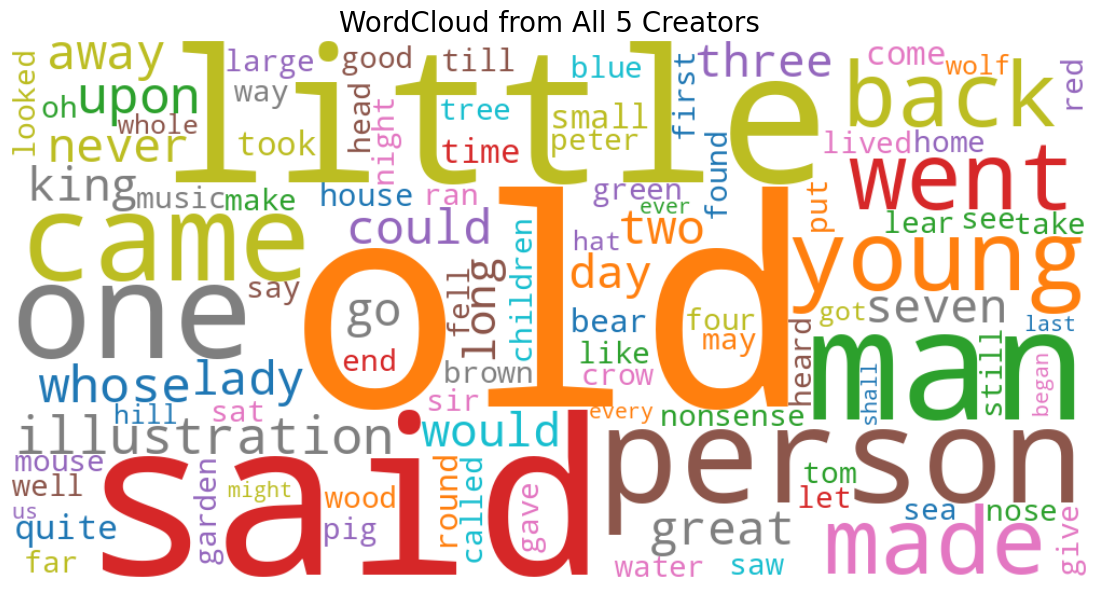

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Path to the combined CSV file (not a folder)
input_file = "/content/5creators_common_core_words.csv"

# Read the CSV containing word-frequency pairs
df = pd.read_csv(input_file)

# Convert to dictionary: {'word1': freq1, 'word2': freq2, ...}
word_freq = dict(zip(df['Word'], df['Frequency']))

# Create and generate the word cloud
wc = WordCloud(width=1000, height=500, background_color='white', colormap='tab10')
wc.generate_from_frequencies(word_freq)

# Display the word cloud inline in Colab
plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud from All 5 Creators", fontsize=20)
plt.show()

#<font color = 'red'> **Common Core Words for each of 5 creators saved as 5 different .csv files under a folder**

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import os

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
file_path = "/content/pg_5creators_16books.csv"
df_ccw = pd.read_csv(file_path)

# Check required columns
if 'text' not in df_ccw.columns or 'creator' not in df_ccw.columns:
    raise ValueError("CSV must contain 'text' and 'creator' columns.")

# ✅ Normalize author names to avoid duplicates
df_ccw['creator'] = df_ccw['creator'].astype(str).str.strip().str.lower()

# Set of stopwords
stop_words = set(stopwords.words('english'))

# Create output folder
output_dir = "common_words_by_creator"
os.makedirs(output_dir, exist_ok=True)

# Group by author and process
for creator, group in df_ccw.groupby('creator'):
    all_text = " ".join(group['text'].astype(str))

    # Tokenize and clean
    words = word_tokenize(all_text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]

    # Count words and get top 100
    word_counts = Counter(words)
    top_words = pd.DataFrame(word_counts.most_common(100), columns=['Word', 'Frequency'])

    # Save to CSV
    filename = f"{output_dir}/common_words_{creator.replace(' ', '_')}.csv"
    top_words.to_csv(filename, index=False)

    print(f"✅ Saved top 100 words for '{creator}' → {filename}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Saved top 100 words for 'beatrix potter' → common_words_by_creator/common_words_beatrix_potter.csv
✅ Saved top 100 words for 'edward lear' → common_words_by_creator/common_words_edward_lear.csv
✅ Saved top 100 words for 'leslie brooke' → common_words_by_creator/common_words_leslie_brooke.csv
✅ Saved top 100 words for 'walter crane' → common_words_by_creator/common_words_walter_crane.csv
✅ Saved top 100 words for 'watty piper' → common_words_by_creator/common_words_watty_piper.csv


#<font color = 'pink'> **a single Wordcloud based on Common Core Words from 5 creators**

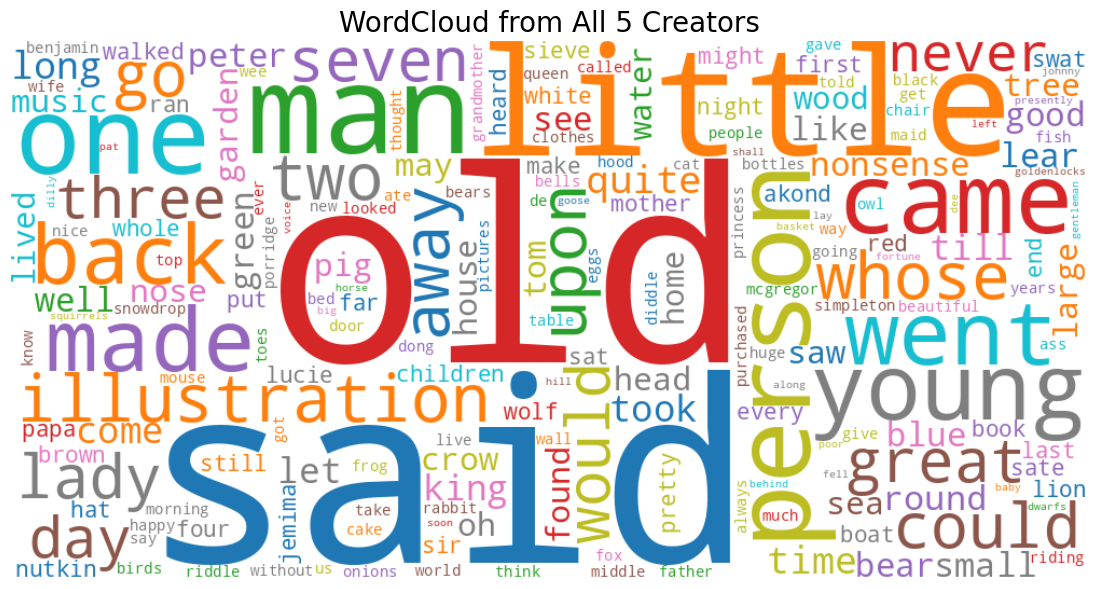

In [ ]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

# Set input directory (where your per-creator word frequency CSVs are stored)
input_dir = "/content/common_words_by_creator"

# Initialize a Counter to accumulate word frequencies across authors
combined_word_counts = Counter()

# Loop through each creator's word frequency file and add to the combined counter
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(input_dir, filename))
        word_freq = dict(zip(df['Word'], df['Frequency']))
        combined_word_counts.update(word_freq)

# Create the word cloud using the combined frequencies
wc = WordCloud(width=1000, height=500, background_color='white', colormap='tab10')
wc.generate_from_frequencies(combined_word_counts)

# Display the word cloud inline in Colab
plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud from All 5 Creators", fontsize=20)
plt.show()


#💣 💣 <font color = 'blue'> **Common Core Words for each author generated under a new folder; however it is not compatible with 'common' since it includes all texts, not a part** <font color ='red'> **Do not use the following two scripts for IFLE 39(02), 2025!**

    - I just decided to keep the scripts for later use...

#<font color = 'pink'> **Wordcloud by author based on Common Core Words**

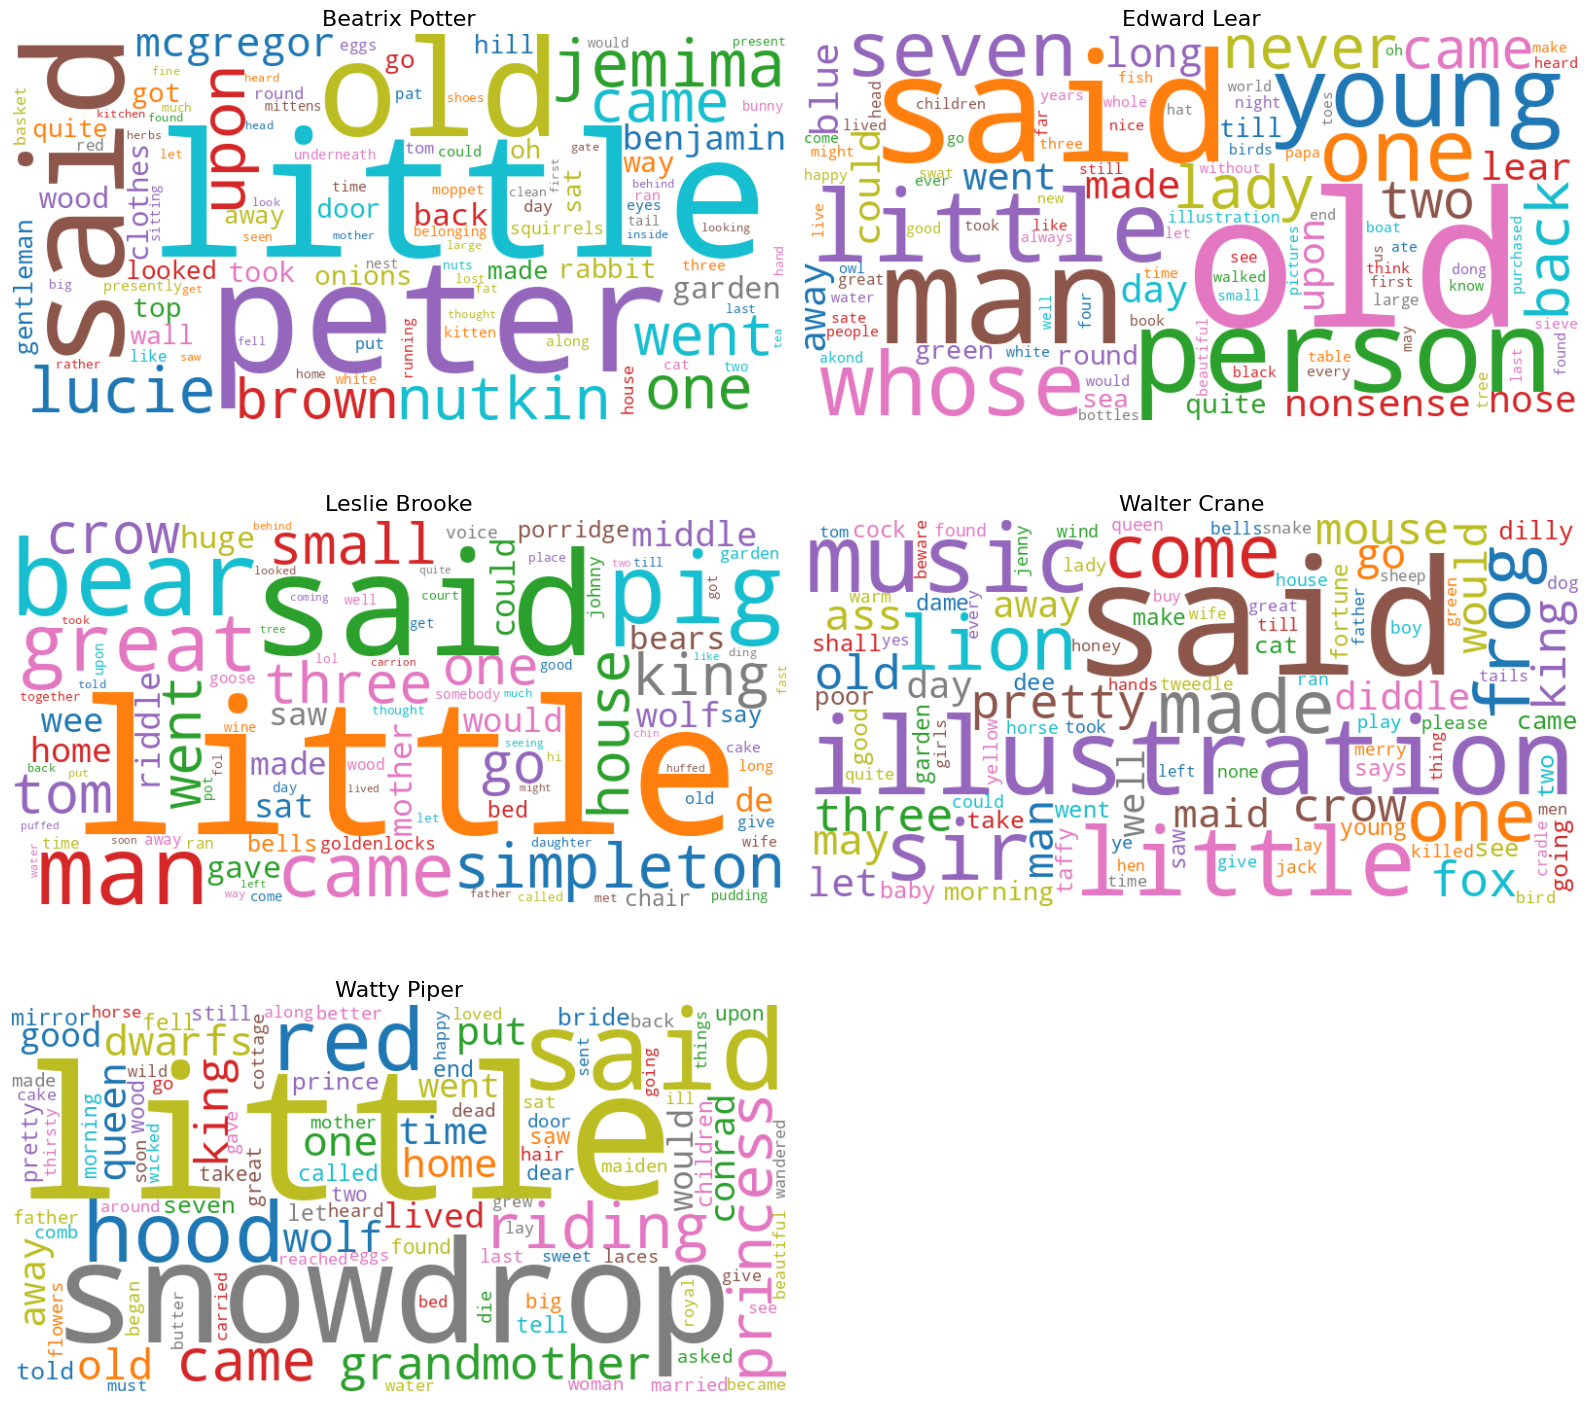

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

# Set input directory (where your author CSV files are stored)
input_dir = "common_words_by_author"

# Adjust figure layout for inline display
n_cols = 2  # Number of WordClouds per row
author_files = sorted([f for f in os.listdir(input_dir) if f.endswith(".csv")])
n_authors = len(author_files)
n_rows = (n_authors + n_cols - 1) // n_cols

# Create a figure
plt.figure(figsize=(n_cols * 8, n_rows * 5))

# Loop through each author
for idx, filename in enumerate(author_files, start=1):
    # Load the CSV and word frequencies
    df = pd.read_csv(os.path.join(input_dir, filename))
    word_freq = dict(zip(df['Word'], df['Frequency']))

    # Generate word cloud
    wc = WordCloud(width=800, height=400, background_color='white', colormap='tab10')
    wc.generate_from_frequencies(word_freq)

    # Get author name from filename
    author_name = filename.replace("common_words_", "").replace(".csv", "").replace("_", " ").title()

    # Add subplot
    plt.subplot(n_rows, n_cols, idx)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(author_name, fontsize=16)

# Display all wordclouds together
plt.tight_layout()
plt.show()